In [1]:
import harp
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from functools import reduce
import cv2
import numpy as np
import utils
import aeon.io.video as video
import aeon.analysis.movies as frame_helpers
from dotmap import DotMap

harp_reader = harp.create_reader('h1-device.yml', epoch=harp.REFERENCE_EPOCH)
session_data_reader = utils.SessionData()

harp_datafolder = r'C:/temp/2024-05-07T15-22-53/HarpDataH1/'
settings_datafolder = r'C:/temp/2024-05-07T15-22-53/SessionSettings/'

ModuleNotFoundError: No module named 'cv2'

In [5]:
# read experiment metadata
session_settings = utils.load_json(session_data_reader, settings_datafolder)

print(session_settings)

                                                                     metadata
1904-01-01 00:26:54.430240  {'motorSettings': {'nominalPulseInterval': 200...


                            OpticalTrackingRead_0  OpticalTrackingRead_1  \
Time                                                                       
1904-01-01 00:26:54.430240                     47                      0   
1904-01-01 00:26:54.440256                     47                      0   
1904-01-01 00:26:54.450240                     45                      0   
1904-01-01 00:26:54.460256                     47                      1   
1904-01-01 00:26:54.470240                     47                      0   
...                                           ...                    ...   
1904-01-01 00:27:31.680256                   -712                   -108   
1904-01-01 00:27:31.690240                   -698                   -105   
1904-01-01 00:27:31.700256                   -690                   -100   
1904-01-01 00:27:31.710240                   -707                   -106   
1904-01-01 00:27:31.720256                   -692                   -104   

           

(array([1864.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1865.]),
 array([0.009984 , 0.0099872, 0.0099904, 0.0099936, 0.0099968, 0.01     ,
        0.0100032, 0.0100064, 0.0100096, 0.0100128, 0.010016 ]),
 <BarContainer object of 10 artists>)

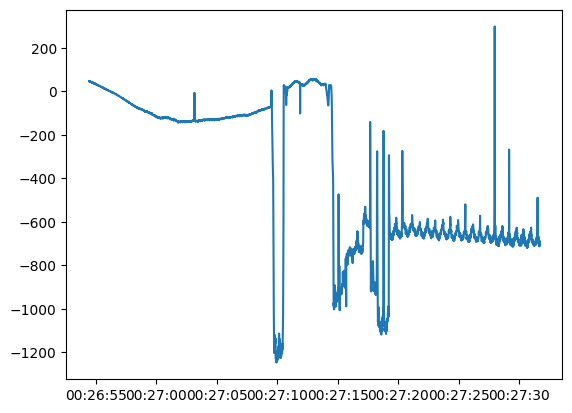

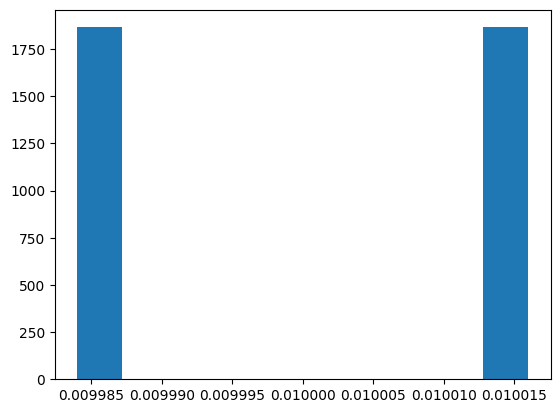

In [30]:
# read harp stream
flow_sensor = utils.load(harp_reader.OpticalTrackingRead, harp_datafolder)
print(flow_sensor)

plt.figure()
plt.plot(flow_sensor['OpticalTrackingRead_0'])

diffs = flow_sensor.index.diff().total_seconds().values
plt.figure()
plt.hist(diffs)